# Intensity measured by the camera for different techniques

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.load('../data/integralSquared.npy')

In [3]:
radius = np.linspace(1, 301, len(data)) #Radius of the particle
V1=4/3*np.pi*(radius)**3 #Volume of the particle
nm=1.333 #Refractive index of the medium
n1=1.58 #Refractive index of the particle
polarizability1= 3/2*V1*(n1**2-nm**2)/(2*nm**2+n1**2) #Polarizability of the particle
wavelength=532 #Wavelength in nanometers
k=2*np.pi*nm/wavelength #Wavevector in vacuum

## Equation 26

Integrated intensity Darkfield

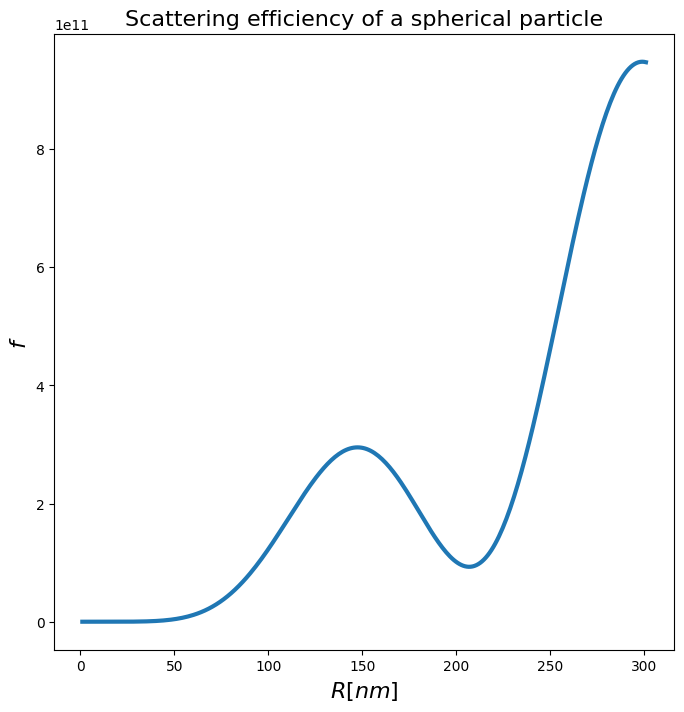

In [17]:
fig, axes = plt.subplots(figsize = (8, 8))
plt.plot(radius, np.squeeze(data)*np.abs(polarizability1)**2, linewidth=3)
axes.set_xlabel('$R [nm]$', fontsize=16)
axes.set_ylabel('$f$', fontsize=16)
axes.set_title('Scattering efficiency of a spherical particle', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Scattering efficiency of a spherical particle')

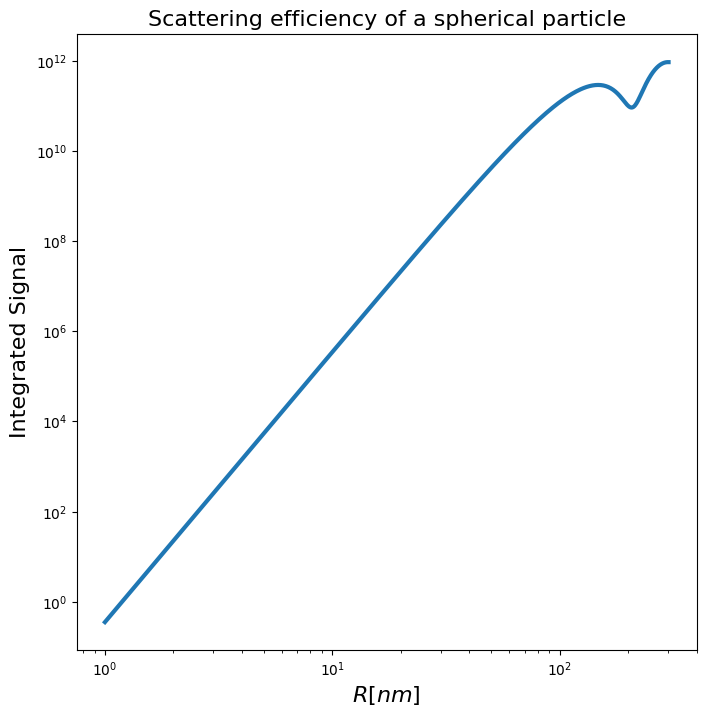

In [16]:
fig, axes = plt.subplots(figsize = (8, 8))
plt.loglog(radius, np.squeeze(data)*np.abs(polarizability1)**2, linewidth=3)
plt.xlabel('$R [nm]$', fontsize=16)
plt.ylabel('Integrated Signal', fontsize=16)
plt.title('Scattering efficiency of a spherical particle', fontsize=16)


## Equation 29

Integrated intensity for Interferometric scattering techniques

In [ ]:
k = (2 * np.pi * nm) / wavelength 
theta = np.pi
q = 2 * k * np.sin(theta/2) 
Form_Factor = 3 / (q*radius)**3 *((np.sin(q*radius) - q*radius*np.cos(q*radius)))

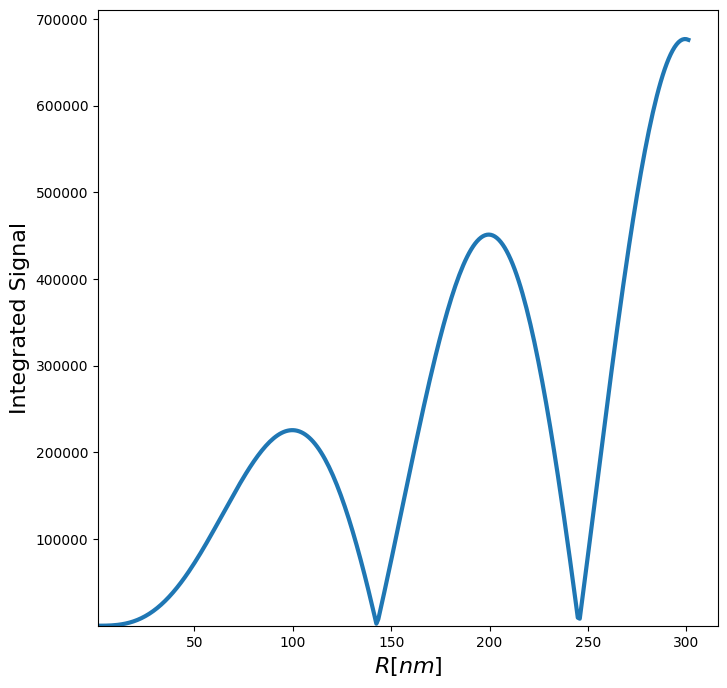

In [15]:
fig, axes = plt.subplots(figsize = (8, 8))
plt.plot(radius, polarizability1*np.abs(Form_Factor), linewidth=3)

axes.set_xlabel('$R [nm]$', fontsize=16)
axes.set_ylabel('Integrated Signal', fontsize=16)

axes.set_ylim(ymin=1)
axes.set_xlim(xmin=1)

plt.show()

Text(0, 0.5, 'Integrated Signal')

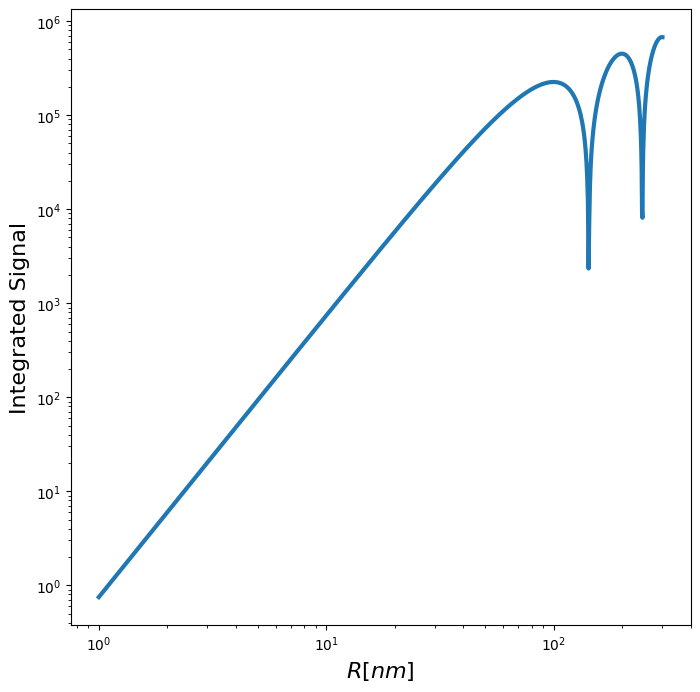

In [14]:
fig, axes = plt.subplots(figsize = (8, 8))
plt.loglog(radius, polarizability1*np.abs(Form_Factor), linewidth=3)
axes.set_xlabel('$R [nm]$', fontsize=16)
axes.set_ylabel('Integrated Signal', fontsize=16)


## Equation 30

Integrated intensity for Quantitative field imaging

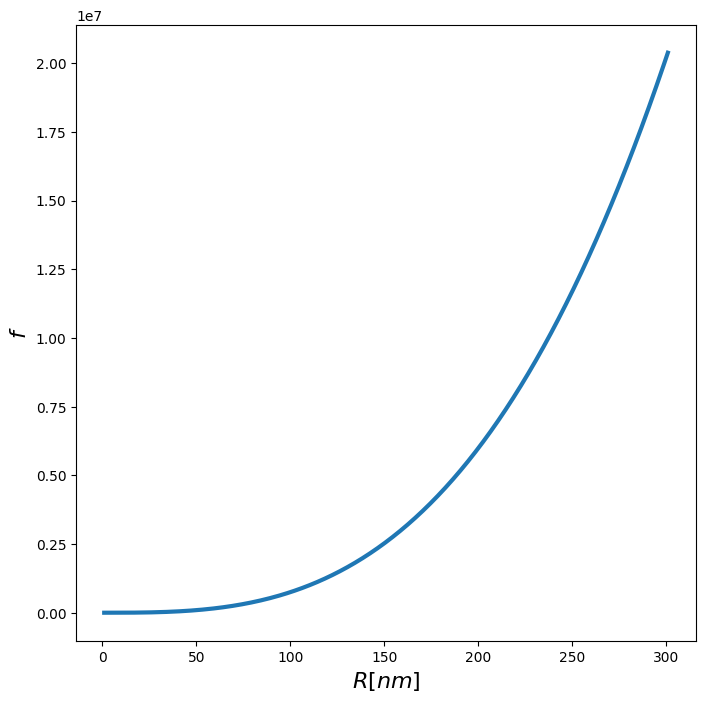

In [8]:
radius = np.linspace(1, 301, len(data))
f = np.ones(len(data))*polarizability1
fig, axes = plt.subplots(figsize = (8, 8))
#f=np.full_like(values, polarizability1[1])
plt.plot(radius, f, linewidth=3)
axes.set_xlabel('$R [nm]$', fontsize=16)
axes.set_ylabel('$f$', fontsize=16)

#axes.set_xticks([0, np.pi/4, np.pi/2, 3/4 * np.pi, np.pi])
#axes.set_xticklabels(['0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'], fontsize = 16)
plt.show()
#fig.savefig('equation_29.svg', format = 'svg', dpi = 300, bbox_inches = 'tight', facecolor = 'white')

Text(0, 0.5, '$f$')

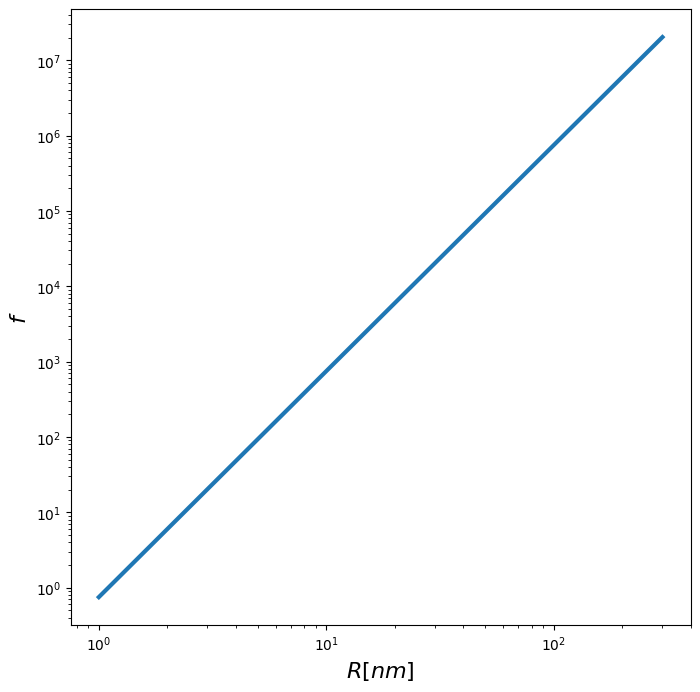

In [9]:
f = np.ones(len(data))*polarizability1
fig, axes = plt.subplots(figsize = (8, 8))
plt.loglog(radius, f, linewidth=3)
axes.set_xlabel('$R [nm]$', fontsize=16)
axes.set_ylabel('$f$', fontsize=16)

## Equation 26, 29 & 30 

Semilog plot for the three modalities 

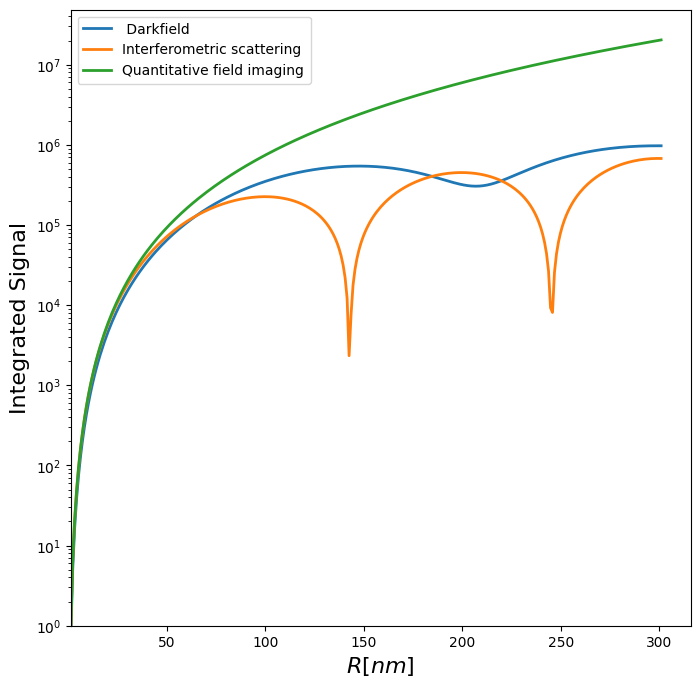

In [10]:
fig, axes = plt.subplots(figsize = (8, 8))

plt.semilogy(radius, np.sqrt(np.squeeze(data)*np.abs(polarizability1)**2), linewidth=2)
plt.semilogy(radius, polarizability1*np.abs(Form_Factor), linewidth=2)
plt.semilogy(radius, f, linewidth=2)
axes.set_xlabel('$R [nm]$', fontsize=16)
axes.set_ylabel('Integrated Signal', fontsize=16)
axes.set_ylim(ymin=1)
axes.set_xlim(xmin=1)

plt.legend([' Darkfield', 'Interferometric scattering ','Quantitative field imaging']) 
fig.savefig('../assets/equation_30.svg', format = 'svg', dpi = 600, bbox_inches = 'tight', facecolor = 'white')
plt.show() 